# imports and data prep

In [1]:
from tqdm import tqdm
import pandas as pd
import json
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, make_scorer, jaccard_score
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVR
from utils.helpers import *

In [2]:
df = pd.read_parquet('data/dataset_01_all.parquet')

In [3]:
df.head()

18      19      20      21      22      23      24      25      26  \
5961   0.0478  0.0491  0.0519  0.0532  0.0536  0.0535  0.0535  0.0538  0.0546   
11667  0.0424  0.0441  0.0467  0.0487  0.0486  0.0487  0.0483  0.0488  0.0499   
7145   0.0462  0.0478  0.0497  0.0508  0.0508  0.0506  0.0510  0.0515  0.0525   
13835  0.0452  0.0460  0.0482  0.0489  0.0493  0.0496  0.0499  0.0506  0.0520   
5139   0.0453  0.0465  0.0488  0.0498  0.0495  0.0501  0.0504  0.0515  0.0523   

           27  ...     159     160     161     162     163     164  soil  \
5961   0.0555  ...  0.1585  0.1588  0.1592  0.1595  0.1598  0.1602   1.0   
11667  0.0507  ...  0.1504  0.1507  0.1509  0.1512  0.1515  0.1518   1.0   
7145   0.0532  ...  0.1564  0.1567  0.1570  0.1572  0.1575  0.1577   1.0   
13835  0.0524  ...  0.1549  0.1552  0.1556  0.1559  0.1562  0.1565   0.0   
5139   0.0530  ...  0.1452  0.1455  0.1459  0.1463  0.1466  0.1469   1.0   

             name  fold  train  
5961   10801920.0   1.0    1.0  
11667  10801920.0   1.0    1.0  
7145   10801920.0   1.0    1.0  
13835  10801920.0   1.0    1.0  
5139   10801920.0   1.0    1.0  

[5 rows x 151 columns]

In [4]:
df.groupby(by=["fold", "soil"]).count().iloc[:,0]

fold  soil
1.0   0.0     186118
      1.0      87141
2.0   0.0     183709
      1.0      86967
3.0   0.0     178270
      1.0      88177
4.0   0.0     182545
      1.0      87354
5.0   0.0     180837
      1.0      83385
Name: 18, dtype: int64

In [5]:
df.groupby(by=["soil"]).count().iloc[:,0]

soil
0.0    911479
1.0    433024
Name: 18, dtype: int64

In [6]:
wavelengths = [414.130000 , 417.320000 , 420.520000 , 423.720000 , 426.910000 , 430.110000 , 433.310000 , 436.500000 , 439.700000 , 442.900000 , 446.090000 , 449.290000 , 452.490000 , 455.680000 , 458.880000 , 462.080000 , 465.270000 , 468.470000 , 471.670000 , 474.860000 , 478.060000 , 481.260000 , 484.450000 , 487.650000 , 490.850000 , 494.040000 , 497.240000 , 500.430000 , 503.630000 , 506.830000 , 510.030000 , 513.220000 , 516.420000 , 519.610000 , 522.810000 , 526.010000 , 529.200000 , 532.400000 , 535.600000 , 538.790000 , 541.990000 , 545.190000 , 548.380000 , 551.580000 , 554.780000 , 557.970000 , 561.170000 , 564.370000 , 567.560000 , 570.760000 , 573.960000 , 577.150000 , 580.350000 , 583.550000 , 586.740000 , 589.940000 , 593.140000 , 596.330000 , 599.530000 , 602.730000 , 605.920000 , 609.120000 , 612.320000 , 615.510000 , 618.710000 , 621.910000 , 625.100000 , 628.300000 , 631.500000 , 634.690000 , 637.890000 , 641.090000 , 644.280000 , 647.480000 , 650.670000 , 653.870000 , 657.070000 , 660.270000 , 663.460000 , 666.660000 , 669.850000 , 673.050000 , 676.250000 , 679.450000 , 682.640000 , 685.840000 , 689.030000 , 692.230000 , 695.430000 , 698.620000 , 701.820000 , 705.020000 , 708.210000 , 711.410000 , 714.610000 , 717.800000 , 721.000000 , 724.200000 , 727.390000 , 730.590000 , 733.790000 , 736.980000 , 740.180000 , 743.380000 , 746.570000 , 749.770000 , 752.970000 , 756.160000 , 759.360000 , 762.560000 , 765.750000 , 768.950000 , 772.150000 , 775.340000 , 778.540000 , 781.740000 , 784.930000 , 788.130000 , 791.330000 , 794.520000 , 797.720000 , 800.920000 , 804.110000 , 807.310000 , 810.510000 , 813.700000 , 816.900000 , 820.100000 , 823.290000 , 826.490000 , 829.680000 , 832.880000 , 836.080000 , 839.280000 , 842.470000 , 845.670000 , 848.860000 , 852.060000 , 855.260000 , 858.460000 , 861.650000 , 864.850000 , 868.040000 , 871.240000 , 874.440000 , 877.630000 , 880.830000 , 884.030000 , 887.220000 , 890.420000 , 893.620000 , 896.810000 , 900.010000 , 903.210000 , 906.400000 , 909.600000 , 912.800000 , 915.990000 , 919.190000 , 922.390000 , 925.580000 , 928.780000 , 931.980000 , 935.170000 , 938.370000 , 941.570000 , 944.760000 , 947.960000 , 951.160000 , 954.350000 , 957.550000 , 960.750000 , 963.940000 , 967.140000 , 970.100000 , 975.540000 , 980.980000 , 986.420000 , 991.860000 , 997.300000 , 1002.740000 , 1008.180000 , 1013.620000 , 1019.060000 , 1024.500000 , 1029.950000 , 1035.390000 , 1040.830000 , 1046.270000 , 1051.710000 , 1057.150000 , 1062.590000 , 1068.030000 , 1073.470000 , 1078.910000 , 1084.350000 , 1089.790000 , 1095.230000 , 1100.670000 , 1106.110000 , 1111.550000 , 1116.990000 , 1122.430000 , 1127.870000 , 1133.320000 , 1138.760000 , 1144.200000 , 1149.640000 , 1155.080000 , 1160.520000 , 1165.960000 , 1171.400000 , 1176.840000 , 1182.280000 , 1187.720000 , 1193.160000 , 1198.600000 , 1204.040000 , 1209.480000 , 1214.920000 , 1220.360000 , 1225.800000 , 1231.240000 , 1236.690000 , 1242.130000 , 1247.570000 , 1253.010000 , 1258.450000 , 1263.890000 , 1269.330000 , 1274.770000 , 1280.210000 , 1285.650000 , 1291.090000 , 1296.530000 , 1301.970000 , 1307.410000 , 1312.850000 , 1318.290000 , 1323.730000 , 1329.170000 , 1334.610000 , 1340.060000 , 1345.500000 , 1350.940000 , 1356.380000 , 1361.820000 , 1367.260000 , 1372.700000 , 1378.140000 , 1383.580000 , 1389.020000 , 1394.460000 , 1399.900000 , 1405.340000 , 1410.780000 , 1416.220000 , 1421.660000 , 1427.100000 , 1432.540000 , 1437.980000 , 1443.430000 , 1448.870000 , 1454.310000 , 1459.750000 , 1465.190000 , 1470.630000 , 1476.070000 , 1481.510000 , 1486.950000 , 1492.390000 , 1497.830000 , 1503.270000 , 1508.710000 , 1514.150000 , 1519.590000 , 1525.030000 , 1530.470000 , 1535.910000 , 1541.350000 , 1546.800000 , 1552.240000 , 1557.680000 , 1563.120000 , 1568.560000 , 1574.000000 , 1579.440000 , 1584.880000 , 1590.320000 , 1595.760000 , 1601.200000 , 1606.640000 , 1612.080000 , 1617.520000 , 1622.960000 , 1628.400000 , 1633.840000 , 1639.280000 , 1644.720000 , 1650.170000 , 1655.610000 , 1661.050000 , 1666.490000 , 1671.930000 , 1677.370000 , 1682.810000 , 1688.250000 , 1693.690000 , 1699.130000 , 1704.570000 , 1710.010000 , 1715.450000 , 1720.890000 , 1726.330000 , 1731.770000 , 1737.210000 , 1742.650000 , 1748.090000 , 1753.540000 , 1758.980000 , 1764.420000 , 1769.860000 , 1775.300000 , 1780.740000 , 1786.180000 , 1791.620000 , 1797.060000 , 1802.500000 , 1807.940000 , 1813.380000 , 1818.820000 , 1824.260000 , 1829.700000 , 1835.140000 , 1840.580000 , 1846.020000 , 1851.460000 , 1856.910000 , 1862.350000 , 1867.790000 , 1873.230000 , 1878.670000 , 1884.110000 , 1889.550000 , 1894.990000 , 1900.430000 , 1905.870000 , 1911.310000 , 1916.750000 , 1922.190000 , 1927.630000 , 1933.070000 , 1938.510000 , 1943.950000 , 1949.390000 , 1954.830000 , 1960.280000 , 1965.720000 , 1971.160000 , 1976.600000 , 1982.040000 , 1987.480000 , 1992.920000 , 1998.360000 , 2003.800000 , 2009.240000 , 2014.680000 , 2020.120000 , 2025.560000 , 2031.000000 , 2036.440000 , 2041.880000 , 2047.320000 , 2052.760000 , 2058.200000 , 2063.650000 , 2069.090000 , 2074.530000 , 2079.970000 , 2085.410000 , 2090.850000 , 2096.290000 , 2101.730000 , 2107.170000 , 2112.610000 , 2118.050000 , 2123.490000 , 2128.930000 , 2134.370000 , 2139.810000 , 2145.250000 , 2150.690000 , 2156.130000 , 2161.570000 , 2167.020000 , 2172.460000 , 2177.900000 , 2183.340000 , 2188.780000 , 2194.220000 , 2199.660000 , 2205.100000 , 2210.540000 , 2215.980000 , 2221.420000 , 2226.860000 , 2232.300000 , 2237.740000 , 2243.180000 , 2248.620000 , 2254.060000 , 2259.500000 , 2264.940000 , 2270.390000 , 2275.830000 , 2281.270000 , 2286.710000 , 2292.150000 , 2297.590000 , 2303.030000 , 2308.470000 , 2313.910000 , 2319.350000 , 2324.790000 , 2330.230000 , 2335.670000 , 2341.110000 , 2346.550000 , 2351.990000 , 2357.430000]

In [7]:
wavelengths[19], wavelengths[165], 'band width', (wavelengths[165]-wavelengths[19])/(165-19)

(474.86, 941.57, 'band width', 3.1966438356164386)

In [8]:
wavelengths_names = [f"{a:.2f}" for a in wavelengths]

In [9]:
features = [str(a) for a in range(430)]
intuition_features = [str(a) for a in range(19, 165)]
intuition_features_5 = [str(a) for a in range(19, 165, 5)]
intuition_features_indices = [str(a) for a in range(19, 165)]+["ndvi", "osavi", "evi"]
indiceslist = ["ndvi", "osavi", "evi"]

In [10]:
def specificity(y, preds):
    return recall_score(y, preds, pos_label=0)

In [11]:
K = 200
selections = {1:[], 2:[], 3:[], 4:[], 5:[], }
selections_200 = selections.copy()

# experiment configuration

In [12]:
datasets = [
    "dataset_01_all",
]
feature_sets = {
    "I-1 feat-s":intuition_features,
    # "I-1 feat-s + indices":intuition_features_indices,
    # "only R B G N":["138", "74", "18", "43"],
    # "only indices":indiceslist,
    # "only ndvi":["ndvi"],
    # "only osavi":["osavi"],
    # "only evi":["evi"],
}

scorers = {"acc":"accuracy", "Sen":"recall", "Spe":make_scorer(specificity), "mcc":make_scorer(matthews_corrcoef)}

models = [
    LogisticRegression(random_state=123, n_jobs=15, max_iter=1000),
    # RandomForestClassifier(random_state=123, n_jobs=15),
    # AdaBoostClassifier(random_state=123),
    # SVC(random_state=123),
]

params = {}
scalers = {}

# CV training

In [13]:
scorers = {"acc": accuracy_score, "Sen": recall_score, "Spe":specificity, "f1":f1_score, "iou":jaccard_score, "mcc":matthews_corrcoef}
folds = 5
predictions = {}

for dataset in datasets:
    df = pd.read_parquet("data/"+dataset+".parquet").astype(np.float64)
    df["ndvi"] = ndvi(df["138"], df["74"])
    df["osavi"] = osavi(df["138"], df["74"], df["18"])
    df["evi"] = evi(df["138"], df["74"], df["18"])

    for model in models:
        res = {"test_acc": [], "test_Sen": [], "test_Spe": [], "test_f1": [], "test_iou": [], "test_mcc": []}
    
        for fn, f in feature_sets.items():

            predictionsname = str(model).split("(")[0]+"__"+fn+"__fold"
            gt = []
        
            print("\n\n",model, "||", dataset, ":::", fn)
            for fold in tqdm(range(1, folds+1)):
                X_train = df.loc[df.fold!=fold, f].astype(float)
                X_val = df.loc[df.fold==fold, f].astype(float)
                y_train = df.loc[df.fold!=fold, "soil"].astype(float)
                y_val = df.loc[df.fold==fold, "soil"].astype(float)
        
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_val = scaler.transform(X_val)
    
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val).round()

                random_samples = selections_200[fold]
                predictions[predictionsname+str(fold)] = list(y_pred[random_samples])
                gt.append(list(y_val.values[random_samples]))
                
                t_selections = pd.DataFrame(np.vstack((y_val, y_pred)).transpose(), columns=["y_val", "y_pred"])
                t_selections = t_selections[t_selections.y_val != t_selections.y_pred]
                selections[fold] = list(set(selections[fold]+list(t_selections.index)))
                  
                for mn, m in scorers.items():
                    t = m(y_val, y_pred)
                    res["test_"+mn].append(t)
            predictions["gt"] = list(gt)
            s = [fn, " & & "]
            for m in scorers.keys():
                s+=['{:.3f}'.format(np.mean(res["test_"+m])), "$\pm$", '{:.3f}'.format(np.std(res["test_"+m])),"&",  '{:.3f}'.format(np.median(res["test_"+m])), "& &"]
            print(*s[:-1])




 LogisticRegression(max_iter=1000, n_jobs=15, random_state=123) || dataset_01_all ::: I-1 feat-s


100%|█████████████████████████████████████████████| 5/5 [01:42<00:00, 20.49s/it]

I-1 feat-s  & &  0.901 $\pm$ 0.004 & 0.903 & & 0.876 $\pm$ 0.010 & 0.874 & & 0.913 $\pm$ 0.004 & 0.914 & & 0.850 $\pm$ 0.007 & 0.851 & & 0.739 $\pm$ 0.010 & 0.741 & & 0.777 $\pm$ 0.009 & 0.779


In [14]:
with open('data/result_extract.json', 'w') as fp:
    json.dump(predictions, fp)

In [15]:
# inference using only indices

scorers = {"acc": accuracy_score, "Sen": recall_score, "Spe":specificity, "f1":f1_score, "iou":jaccard_score, "mcc":matthews_corrcoef}
folds = 5
predictions = {}

for dataset in datasets:
    df = pd.read_parquet("data/"+dataset+".parquet").astype(np.float64)

    df["bsi"] = bsi(df["138"], df["74"], df["18"], df["43"])
    df["sr"] = sr(df["138"], df["74"])
    df["ndvi"] = ndvi(df["138"], df["74"])
    df["osavi"] = osavi(df["138"], df["74"], df["18"])
    df["evi"] = evi(df["138"], df["74"], df["18"])

    df["y_bsi"] = 0
    df["y_sr"] = 0
    df["y_ndvi"] = 0
    df["y_osavi"] = 0
    df["y_evi"] = 0

    for ind, th_min, th_max in [["bsi", 0.15303, 0.218182], ["evi", 0.051515, 0.106061], ["ndvi", 0.116667, 0.213636], ["osavi", 0.078081, 0.136061], ["sr", 1.262626, 1.545455]]:
        res = {"test_acc": [], "test_Sen": [], "test_Spe": [], "test_f1": [], "test_iou": [], "test_mcc": []}

        df.loc[(df[ind]>=th_min)&(df[ind]<=th_max), "y_"+ind] = 1
        gt = []
        
        predictionsname = ind+"__fold"
        
        for fold in tqdm(range(1, folds+1)):
            y_val = df.loc[df.fold==fold, "soil"].astype(float)
            y_pred = df.loc[df.fold==fold, "y_"+ind]
            random_samples = selections_200[fold]
            predictions[predictionsname+str(fold)] = list(y_pred.values[random_samples].astype(float))
            gt.append(list(y_val.values[random_samples].astype(float)))
            
            for mn, m in scorers.items():
                t = m(y_val, y_pred)
                res["test_"+mn].append(t)
        predictions["gt"] = list(gt)
        
        s = [ind, " & & "]
        for m in scorers.keys():
            s+=['{:.3f}'.format(np.mean(res["test_"+m])), "$\pm$", '{:.3f}'.format(np.std(res["test_"+m])),"&",  '{:.3f}'.format(np.median(res["test_"+m])), "& &"]
        print(*s[:-1]," \\\\")
          

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 30.20it/s]


bsi  & &  0.919 $\pm$ 0.001 & 0.918 & & 0.925 $\pm$ 0.003 & 0.924 & & 0.916 $\pm$ 0.002 & 0.915 & & 0.879 $\pm$ 0.003 & 0.881 & & 0.785 $\pm$ 0.005 & 0.787 & & 0.821 $\pm$ 0.003 & 0.820  \\


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 31.74it/s]


evi  & &  0.851 $\pm$ 0.003 & 0.850 & & 0.830 $\pm$ 0.011 & 0.835 & & 0.861 $\pm$ 0.008 & 0.858 & & 0.781 $\pm$ 0.005 & 0.784 & & 0.641 $\pm$ 0.007 & 0.645 & & 0.671 $\pm$ 0.007 & 0.673  \\


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 31.60it/s]


ndvi  & &  0.918 $\pm$ 0.002 & 0.918 & & 0.917 $\pm$ 0.003 & 0.917 & & 0.918 $\pm$ 0.004 & 0.917 & & 0.878 $\pm$ 0.002 & 0.877 & & 0.782 $\pm$ 0.003 & 0.781 & & 0.818 $\pm$ 0.002 & 0.817  \\


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 31.12it/s]


osavi  & &  0.890 $\pm$ 0.003 & 0.891 & & 0.875 $\pm$ 0.007 & 0.875 & & 0.898 $\pm$ 0.005 & 0.898 & & 0.836 $\pm$ 0.004 & 0.836 & & 0.719 $\pm$ 0.006 & 0.718 & & 0.756 $\pm$ 0.006 & 0.756  \\


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 31.28it/s]

sr  & &  0.918 $\pm$ 0.002 & 0.918 & & 0.921 $\pm$ 0.003 & 0.921 & & 0.916 $\pm$ 0.003 & 0.915 & & 0.878 $\pm$ 0.002 & 0.877 & & 0.782 $\pm$ 0.003 & 0.781 & & 0.818 $\pm$ 0.002 & 0.817  \\


In [16]:
with open('data/result_extract_indices.json', 'w') as fp:
    json.dump(predictions, fp)

In [17]:
def set_style() -> None:
    sns.set(font='serif')
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["umr10", "Times", "Palatino", "serif"]
    })
    plt.rcParams.update({"mathtext.fontset": "cm", "mathtext.rm": "serif"})

In [18]:
tdf = df[df.evi>0].sample(2000, random_state=123)
cols = ["y_ndvi", "y_bsi", "y_osavi", "y_evi", "y_sr"]
preds = pd.melt(tdf[cols], value_vars=cols, var_name='IndexPreds', value_name='Preds')
y = list(tdf.soil)
preds["Soil"] = 5 * y

cols= ["ndvi", "bsi", "osavi", "evi", "sr"]
indices = pd.melt(tdf[cols], value_vars=cols, var_name='Index', value_name='Value')
indices = pd.concat((indices, preds), axis=1)
indices.Index = indices.Index.str.upper()

indices["CM"] = "TP"
indices.loc[(indices.Preds==0)&(indices.Soil==0),"CM"]= "TN"
indices.loc[(indices.Preds==0)&(indices.Soil==1),"CM"]= "FP"
indices.loc[(indices.Preds==1)&(indices.Soil==0),"CM"]= "FN"
indices.sample(10)

Index     Value IndexPreds  Preds  Soil  CM
5133  OSAVI  0.137800    y_osavi      0   1.0  FP
2014    BSI  0.206537      y_bsi      1   1.0  TP
9500     SR  2.381135       y_sr      0   0.0  TN
9432     SR  1.592430       y_sr      0   0.0  TN
7955    EVI  0.071112      y_evi      1   1.0  TP
2901    BSI  0.348636      y_bsi      0   0.0  TN
4783  OSAVI  0.085839    y_osavi      1   1.0  TP
9623     SR  1.715224       y_sr      0   0.0  TN
5307  OSAVI  0.305338    y_osavi      0   0.0  TN
7729    EVI  0.238622      y_evi      0   0.0  TN

/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/anaconda3/envs/ml/lib/python3.9/site-

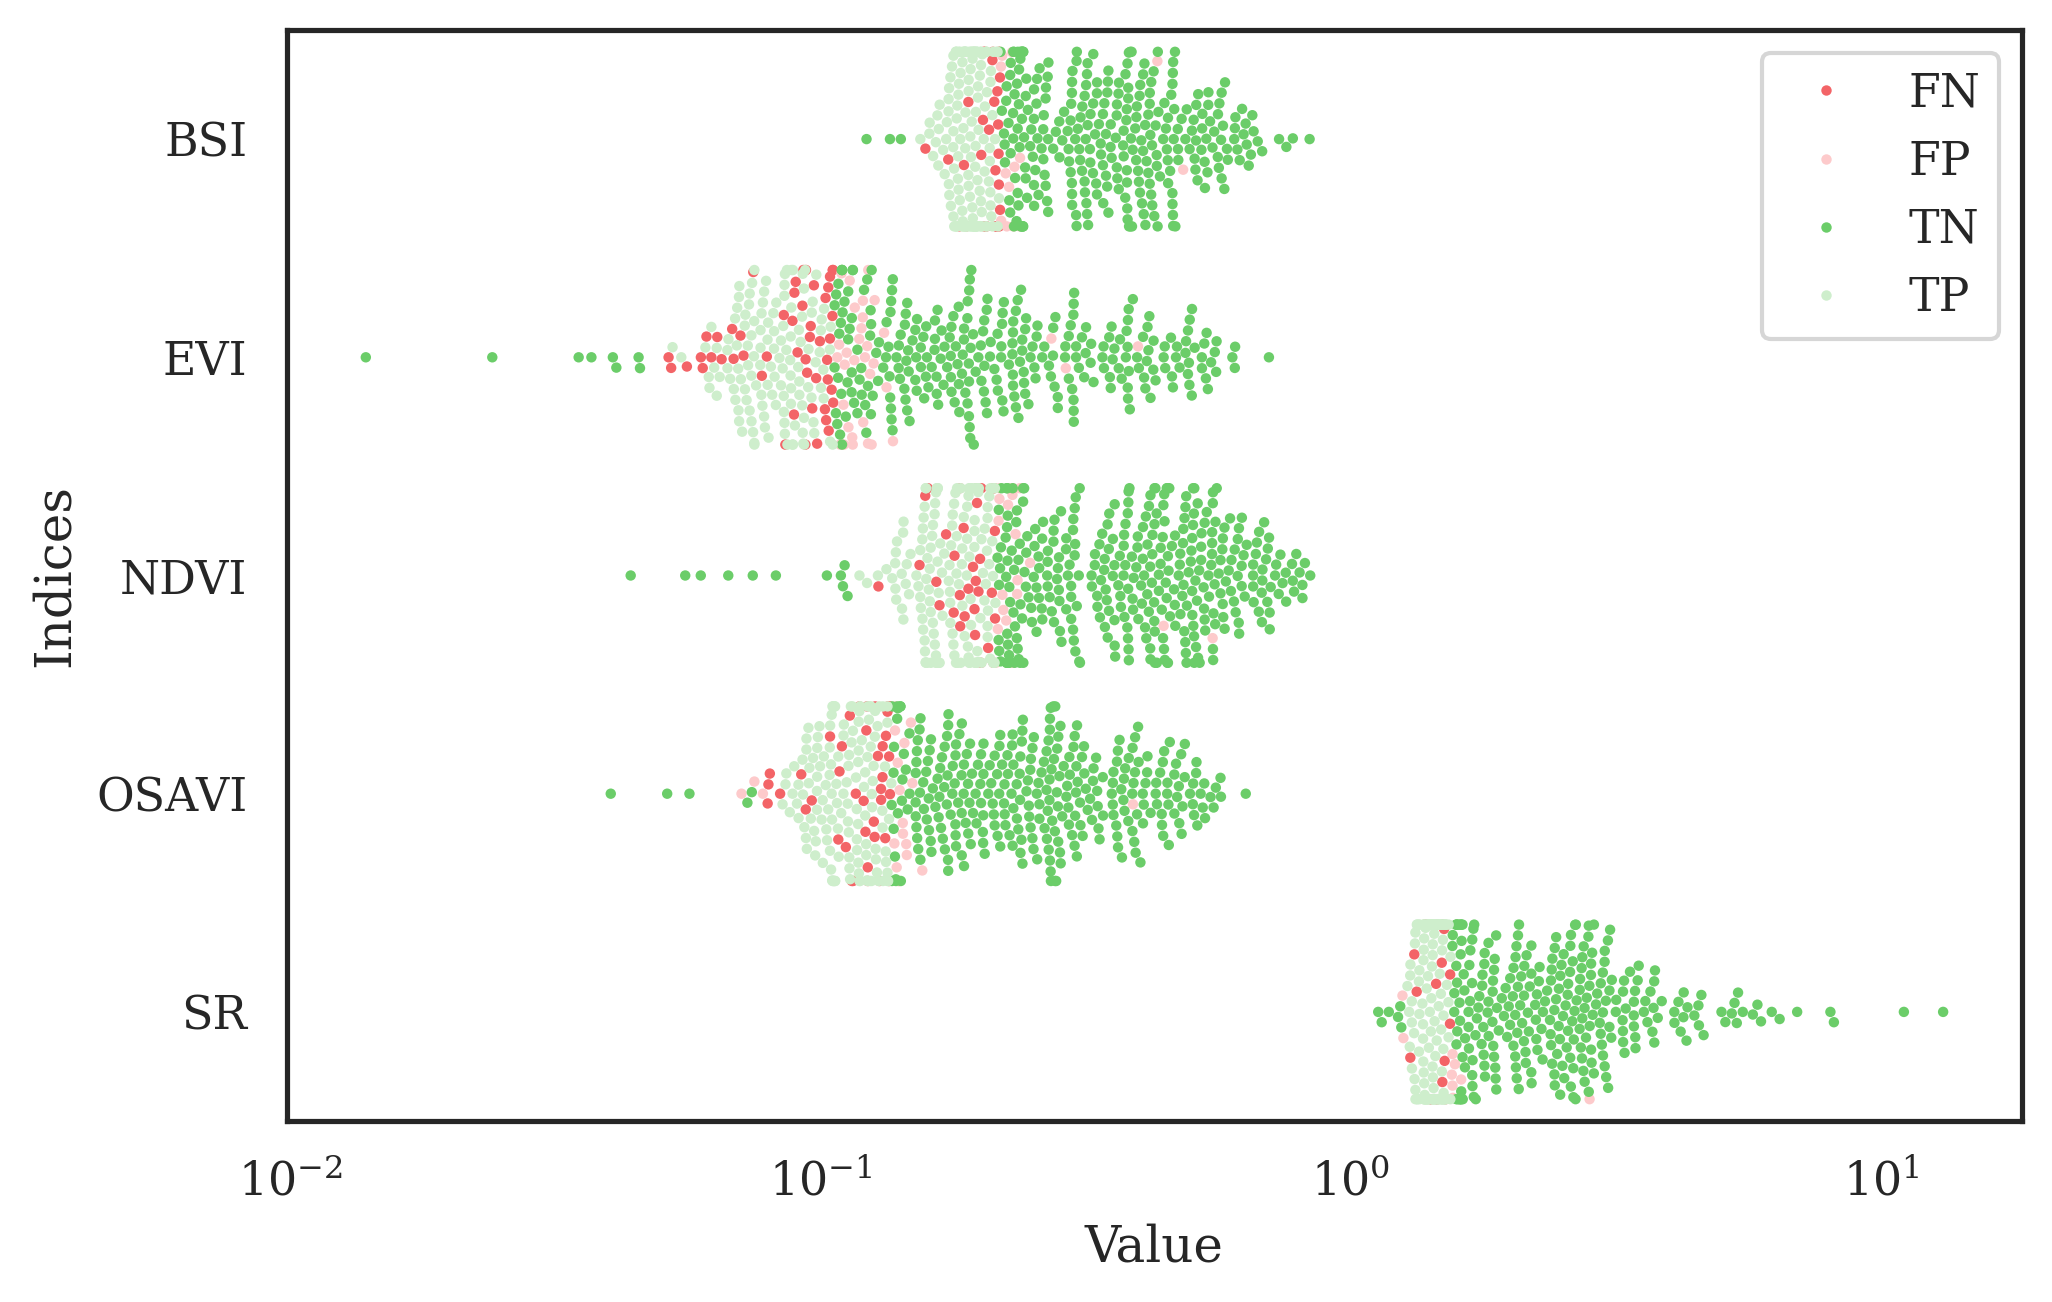

In [19]:
set_style()
fig, ax = plt.subplots(figsize=(7,4.5), dpi=300)
colors = ["#F36467","#fdcacbff","#6bcd69ff","#ceeeccff"]
ax = sns.swarmplot(data=indices.sample(2500).sort_values(by=["Index", "CM"]), x="Value", y="Index", 
                   hue="CM", size=2.5, palette=colors, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
plt.ylabel("Indices")
plt.xscale('log')
plt.tight_layout()
plt.savefig("data/pixel_indices_distirbution.png")
plt.show()